In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
for dirname, _, filenames in os.walk('/Data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import bz2
import pandas as pd
import re 
import numpy as np
#Import Dataset
train_file = bz2.BZ2File('C:/Users/Tanushka/Documents/S6/NLP/prj2/Data/train.ft.txt.bz2')
test_file = bz2.BZ2File('C:/Users/Tanushka/Documents/S6/NLP/prj2/Data/test.ft.txt.bz2')

In [3]:
#Reading Data set
train_file = train_file.readlines()
test_file = test_file.readlines()

In [4]:
print("Number of training reivews: " + str(len(train_file)))
print("Number of test reviews: " + str(len(test_file)))

Number of training reivews: 3600000
Number of test reviews: 400000


In [5]:
#training on the first 100000 reviews in the  dataset
num_train = 100000
#Using 2000 reviews from test set
num_test = 20000#Using 20000 reviews from test set

train_file = [x.decode('utf-8') for x in train_file[:num_train]]
test_file = [x.decode('utf-8') for x in test_file[:num_test]]

In [6]:
#Extracting Labels and Review from training Dataset
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file]

In [7]:
#Extracting Labels and Review from test Dataset
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file]

In [8]:
#Creating Data Frame
train = pd.DataFrame({'text':train_sentences,'label':train_labels})
test=pd.DataFrame({'text':test_sentences,'label':test_labels})

In [9]:
train.head()

,text,label
0,stuning even for the non-gamer: this sound tra...,1
1,the best soundtrack ever to anything.: i'm rea...,1
2,amazing!: this soundtrack is my favorite music...,1
3,excellent soundtrack: i truly like this soundt...,1
4,"remember, pull your jaw off the floor after he...",1


In [10]:
train.describe()

,label
count,100000.000000
mean,0.512670
std,0.499842
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [11]:
train['number_of_words'] = train['text'].str.lower().str.split().apply(len)
train.head()

,text,label,number_of_words
0,stuning even for the non-gamer: this sound tra...,1,80
1,the best soundtrack ever to anything.: i'm rea...,1,97
2,amazing!: this soundtrack is my favorite music...,1,129
3,excellent soundtrack: i truly like this soundt...,1,118
4,"remember, pull your jaw off the floor after he...",1,87


In [12]:
test['number_of_words'] = test['text'].str.lower().str.split().apply(len)
test.head()

,text,label,number_of_words
0,great cd: my lovely pat has one of the great v...,1,106
1,one of the best game music soundtracks - for a...,1,148
2,batteries died within a year ...: i bought thi...,0,60
3,"works fine, but maha energy is better: check o...",1,37
4,great for the non-audiophile: reviewed quite a...,1,69


<AxesSubplot:xlabel='label', ylabel='count'>

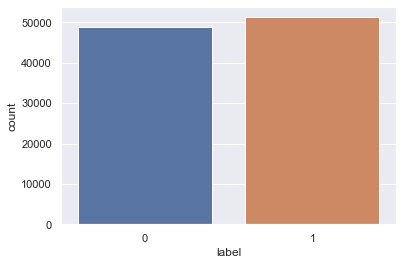

In [13]:
#Data Visulaization
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="label", data=train)

<AxesSubplot:ylabel='Frequency'>

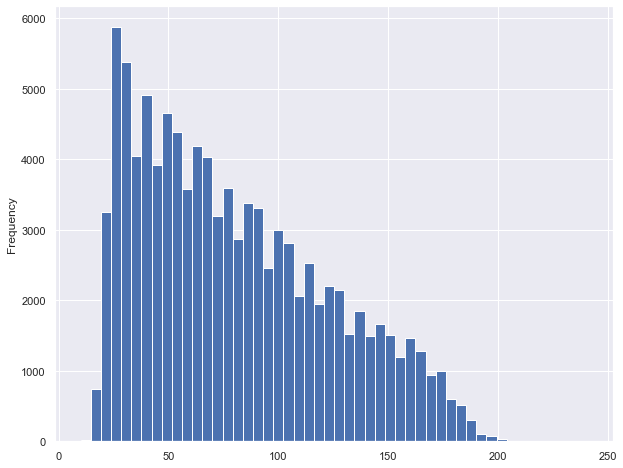

In [14]:
train['number_of_words'].plot(bins=50, kind='hist',figsize = (10,8)) 

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

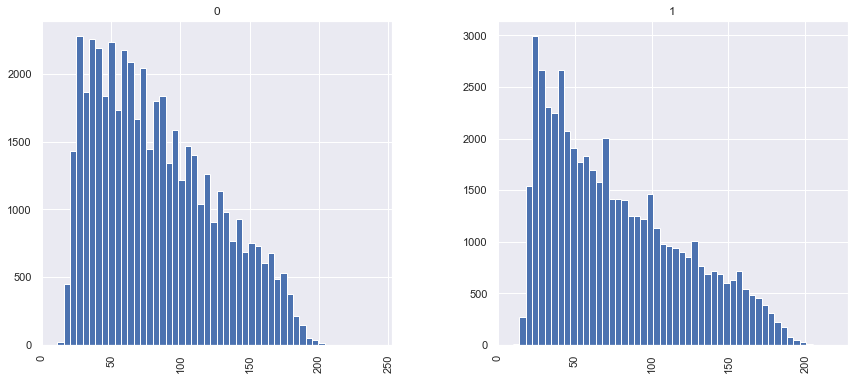

In [15]:
train.hist(column='number_of_words', by='label',
           bins=50,figsize=(14,6))

In [16]:
#Data Preprocessing
import re

import nltk

def remove_url(text):
     url=re.compile(r"https?://\S+|www\.\S+")
     return url.sub(r" ",text)

def remove_html(text):
  cleanr = re.compile('<.*?>')
  return cleanr.sub(r" ",text)



def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

import string
def remove_punc(text):
   table=str.maketrans(' ',' ',string.punctuation)
   return text.translate(table)

nltk.download('stopwords')
from nltk.corpus import stopwords
stop=set(stopwords.words("english"))
 
def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tanushka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
train['text']=train.text.map(lambda x:remove_url(x))
train['text']=train.text.map(lambda x:remove_html(x))
train['text']=train.text.map(lambda x:remove_punc(x))
train['text']=train['text'].map(remove_num)
train['text']=train['text'].map(remove_stopword)

In [18]:
test['text']=test.text.map(lambda x:remove_url(x))
test['text']=test.text.map(lambda x:remove_html(x))
test['text']=test.text.map(lambda x:remove_punc(x))
test['text']=test['text'].map(remove_num)
test['text']=test['text'].map(remove_stopword)

In [19]:

def Stemming(text):
   stem=[]
   from nltk.corpus import stopwords
   from nltk.stem import SnowballStemmer
  #is based on The Porter Stemming Algorithm
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [20]:
train['text']=train['text'].map(Stemming)
test['text']=test['text'].map(Stemming)

In [21]:
import tensorflow as tf

In [22]:
#Word Embedding
max_length=100
vocab_size=12000
embedding_dim=64
trunc_type="post"
oov_tok="<OOV>"
padding_type="post"
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(train['text'])

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(train['text'])
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
testing_sequences = tokenizer.texts_to_sequences(test['text'])
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [24]:
training_padded[1]

array([  25,  805,   51,  181,   52,    6,   86,   49,   45,   25,  113,
        805,  483,  309,  101,   49, 2068,  161,    1,    1,    1, 1069,
        735,   43, 1571,   52,  111,   29,  173,  315, 1829,    1,  132,
       2734,  160, 7108,  112,   45,   31,   23,   37,   21,   75,    3,
         90,   11,  100,   93, 2076,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0])

In [25]:
print(training_sequences[0])

[1, 20, 1, 74, 193, 173, 1072, 1, 317, 22, 11, 1222, 20, 57, 348, 9334, 113, 43, 67, 113, 1, 1298, 113, 51, 67, 25, 43, 60, 179, 2987, 1976, 72, 11607, 788, 2075, 692, 741, 3169, 11, 459, 125, 245, 111]


In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM,GRU
from keras.preprocessing import sequence
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score    
from tensorflow.python.keras import models, layers, optimizers   
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, SpatialDropout1D
from keras.layers.wrappers import Bidirectional
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [27]:
#Bidirectional LSTM Model
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(256, dropout=0.2)))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 64)           768000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               657408    
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 1,425,921
Trainable params: 1,425,921
Non-trainable params: 0
_________________________________________________________________


In [28]:
adam=Adam(lr=0.0001)

In [29]:
model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'] )

In [30]:
history=model.fit(training_padded,train['label'], epochs=15, batch_size=256,verbose = 1,callbacks = [EarlyStopping(monitor='val_accuracy', patience=2)],validation_data=(testing_padded,test['label']))

Epoch 1/15
391/391 [==============================] - 2694s 7s/step - loss: 0.5264 - accuracy: 0.7242 - val_loss: 0.3693 - val_accuracy: 0.8451
Epoch 2/15
391/391 [==============================] - 1171s 3s/step - loss: 0.3420 - accuracy: 0.8581 - val_loss: 0.3243 - val_accuracy: 0.8649
Epoch 3/15
391/391 [==============================] - 996s 3s/step - loss: 0.2986 - accuracy: 0.8772 - val_loss: 0.3116 - val_accuracy: 0.8716
Epoch 4/15
391/391 [==============================] - 1004s 3s/step - loss: 0.2740 - accuracy: 0.8882 - val_loss: 0.2933 - val_accuracy: 0.8766
Epoch 5/15
391/391 [==============================] - 1028s 3s/step - loss: 0.2570 - accuracy: 0.8953 - val_loss: 0.2864 - val_accuracy: 0.8810
Epoch 6/15
391/391 [==============================] - 1034s 3s/step - loss: 0.2467 - accuracy: 0.9011 - val_loss: 0.2806 - val_accuracy: 0.8831
Epoch 7/15
391/391 [==============================] - 999s 3s/step - loss: 0.2372 - accuracy: 0.9044 - val_loss: 0.2802 - val_accuracy: 0

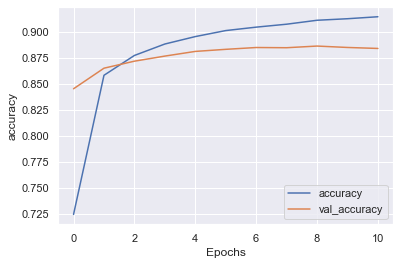

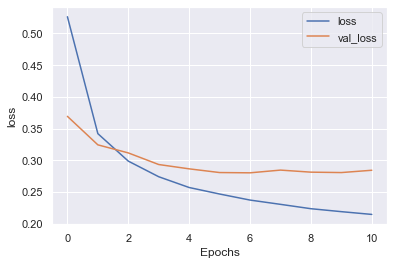

In [31]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [32]:
def Review(sentence):
   sequences = tokenizer.texts_to_sequences(sentence)
   padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

   prob=model.predict(padded)
   if prob>=0.8:
     print(5)
   elif prob>=0.6:
     print(4)
   elif prob>=0.4:
     print(3) 
   elif prob>=0.2:
     print(2)   
   else:
       print(1)

In [33]:
sentence=['Good Product + exactly in size']
Review(sentence)

5


In [34]:
sentence=["this is worst thing don't buy it"]
Review(sentence)

1


In [35]:
sentence=["the product is OK!"]
Review(sentence)

2


In [36]:
sentence=["What kind of product is this!"]
Review(sentence)

2


In [38]:
sentence=["I hate how you manage to brainwash customers exaggerating the material of cloth"]
Review(sentence)

1


In [39]:
sentence=["Im not completely fine with the material , but price is worth ittttttt"]
Review(sentence)

3


In [40]:
sentence=["Time waste + Money waste + Material waste + Fast delivery !!!"]
Review(sentence)

2


In [41]:
# Predicting the Test set results
y_pred = model.predict(testing_padded)
y_pred = (y_pred > 0.5)
X_test=testing_padded
y_test=test['label']

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
 
# ROC AUC
auc = roc_auc_score(y_test, y_pred)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

Accuracy: 0.883900
Precision: 0.889767
Recall: 0.881927
F1 score: 0.885829
ROC AUC: 0.883943
[[8670 1116]
 [1206 9008]]


In [44]:
#Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      9786
           1       0.89      0.88      0.89     10214

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



<AxesSubplot:>

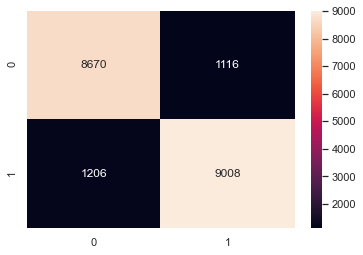

In [45]:
#Confusion Matrix
import seaborn as sns
sns.heatmap(matrix,annot=True,fmt='')

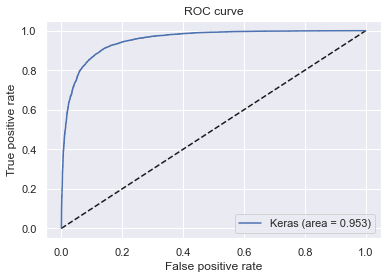

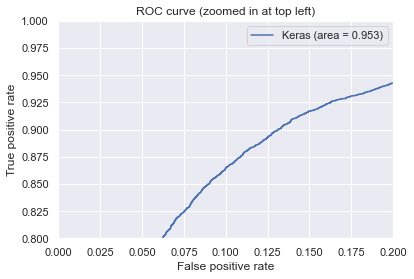

In [46]:
#ROC Curve

from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
# Zoom in view of the upper left corner.
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()